<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/19_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# GAN(적대적 신경망)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# 생성자 모델 (Generator)
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization()) # 이미지 데이터 분포 정규화
generator.add(Reshape((7, 7, 128))) # 7 x 7
generator.add(UpSampling2D()) # 7 x 7 -> 14 x 14
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization()) # 이미지 데이터 분포 정규화
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 14 x 14 -> 28 x 28
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              633472    
                                                                 
 batch_normalization_4 (Bat  (None, 6272)              25088     
 chNormalization)                                                
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        204864    
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 64)       

In [9]:
# 판별자 모델
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 activation_3 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 activation_4 (Activation)   (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [8]:
# 생성자와 판별자 연결, gan 모델 생성
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         865281    
                                                                 
 sequential_3 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


1/1 [==============================] - 0s 82ms/step
epoch:0  d_loss:0.2132  g_loss:0.6382
1/1 [==============================] - 0s 153ms/step
epoch:1  d_loss:0.1447  g_loss:0.6325
1/1 [==============================] - 0s 174ms/step
epoch:2  d_loss:0.0684  g_loss:0.6227
1/1 [==============================] - 0s 146ms/step
epoch:3  d_loss:0.0263  g_loss:0.6240
1/1 [==============================] - 0s 75ms/step
epoch:4  d_loss:0.0089  g_loss:0.6188
1/1 [==============================] - 0s 73ms/step
epoch:5  d_loss:0.0042  g_loss:0.6131
1/1 [==============================] - 0s 71ms/step
epoch:6  d_loss:0.0009  g_loss:0.5996
1/1 [==============================] - 0s 72ms/step
epoch:7  d_loss:0.0003  g_loss:0.6155
1/1 [==============================] - 0s 72ms/step
epoch:8  d_loss:0.0001  g_loss:0.6074
1/1 [==============================] - 0s 72ms/step
epoch:9  d_loss:0.0000  g_loss:0.6058
1/1 [==============================] - 0s 89ms/step
epoch:10  d_loss:0.0000  g_loss:0.6070
1/1 [=

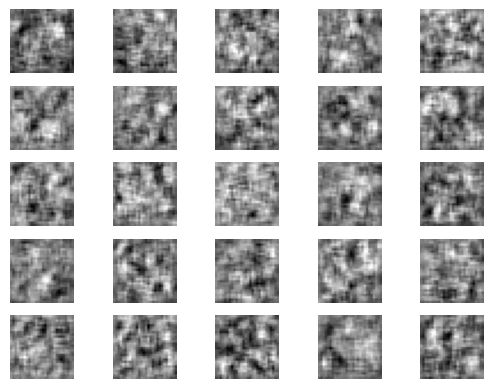

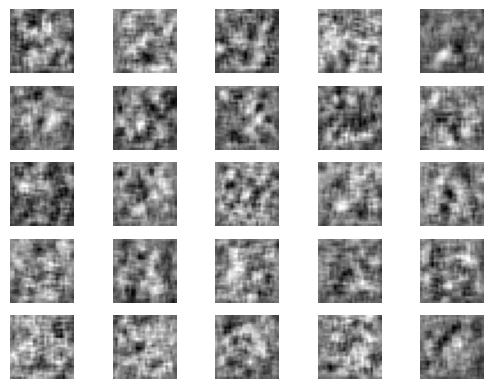

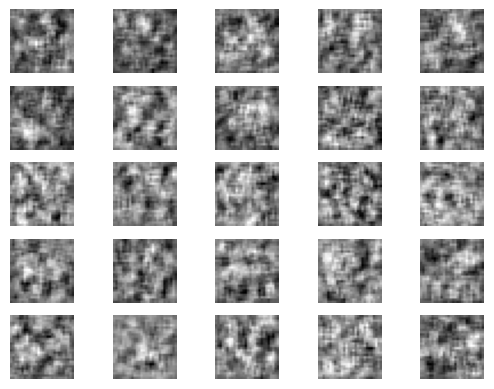

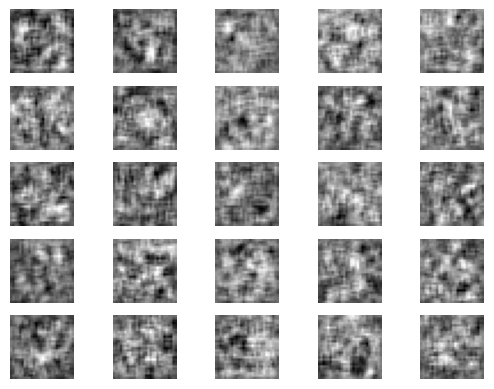

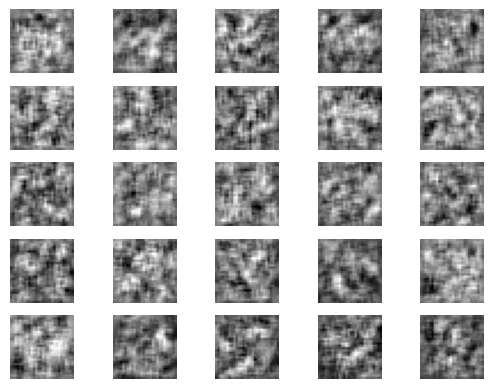

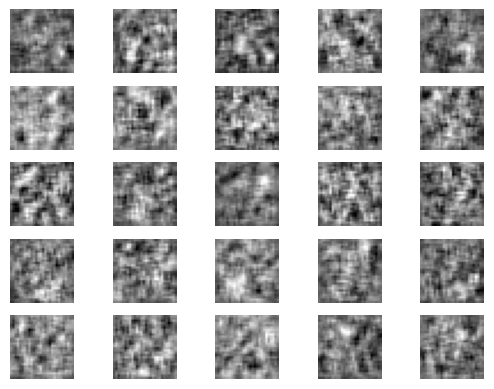

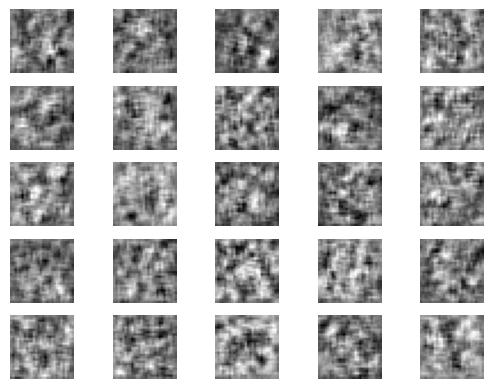

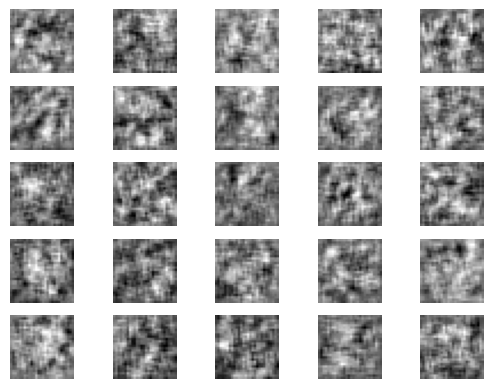

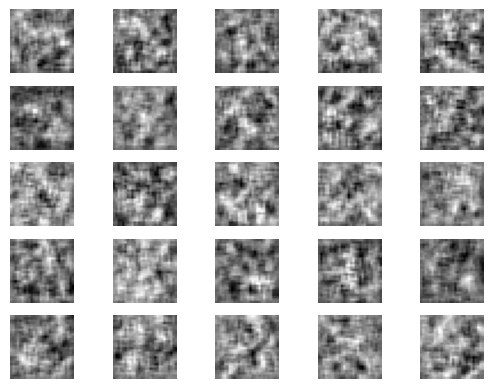

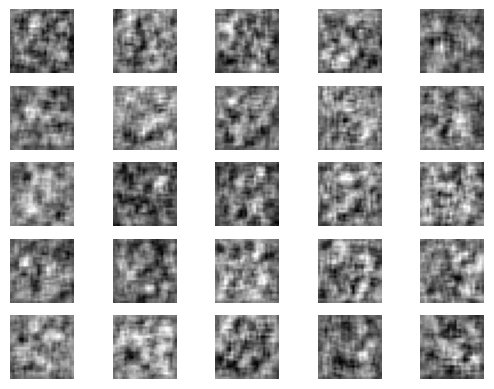

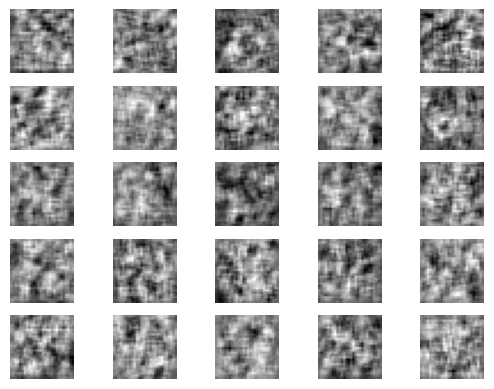

In [17]:
# 신경망 실행 함수 생성
def gan_train(epoch, batch_size, saving_interval):
  (X_train, _), (_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

  X_train = (X_train - 127.5) / 127.5

  true = np.ones((batch_size, 1)) # [1,1,1,1,1,1,1]
  fake = np.zeros((batch_size, 1)) # [0.0.0.0.0.0.0]

  for i in range(epoch):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)

    # 가상 이미지를 판별자에 입력
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    # 판별자와 생성자의 오차를 계산
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)

    print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

    #
    if i % saving_interval == 0:
      noise = np.random.normal(0, 1, (25, 100))
      gen_imgs = generator.predict(noise)

      # Rescale images 0 - 1
      gen_imgs = 0.5 * gen_imgs + 0.5

      fig, axs = plt.subplots(5, 5)
      count = 0

      for j in range(5):
        for k in range(5):
          axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
          axs[j, k].axis('off')
          count += 1
      fig.savefig("/content/sample_data/gan_images/gan_mnist_%d.png" % i)

# 2000번 반복, 배치 크기는 32, 200번마다 결과 저장
gan_train(2001, 32, 200)

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                         

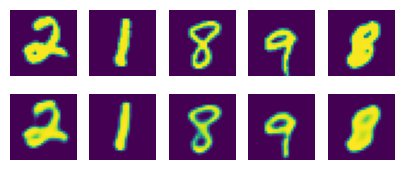

In [1]:
# 오토인코더
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import Activation, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

random_test = np.random.randint(X_test.shape[0], size=5)

ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지 나열
  ax = plt.subplot(2, 7, i+1)

  # 테스트할 이미지 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)

  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')

plt.show()